Où se trouve le dossier sur la machine ?
http://10.117.49.59:8888/notebooks/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/Test_GGD_Pi.ipynb

In [2]:
# pour telecharder de la machine à mon ordinateur local
import os

def sync_files(user, host, password, remote_path, local_path=None):
    if local_path is None:
        local_path = os.getcwd()

    # Détection : est-ce un fichier (on regarde si un nom de fichier semble être présent) ?
    is_file = os.path.splitext(local_path)[1] != ""

    if is_file:
        # Cas fichier : on s'assure que le dossier contenant le fichier existe
        local_dir = os.path.dirname(local_path)
        if not os.path.exists(local_dir):
            print(f"📁 Création du dossier parent : {local_dir}")
            os.makedirs(local_dir)
        command = f'sshpass -p "{password}" rsync -ah --progress -u "{user}@{host}:{remote_path}" "{local_path}"'
    else:
        # Cas dossier : on crée le dossier si nécessaire
        if not os.path.exists(local_path):
            print(f"📁 Création du dossier : {local_path}")
            os.makedirs(local_path)
        command = f'sshpass -p "{password}" rsync -ah --progress -u "{user}@{host}:{remote_path}" "{local_path}"'

    print(f"🚀 Exécution : {command}")
    !{command}



In [4]:
# Définition des informations communes
PASSWORD="Cedt,ll?"
USER="isabelle.bouchoule"
HOST="10.117.49.59"

In [6]:
# parametre selectionné
nom1 = "theta_edge_1.0_ih1"
nom2 = "theta_edge_1.0_ih2"
date = "2025-01-27"
mu , T , x0 , Taille = 64.676, 559.424, 18.339, 22.089

In [8]:
import os

index_last_underscore = nom2.rfind('_')
remote_path0 ="/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/"
local_path = os.getcwd()

# theta
filename = f"{date}/theta_discr_{nom2[index_last_underscore+1:]}.npz"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )

# nu
filename = f"{date}/nu_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz" 
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )

# veff
filename = f"{date}/veff_bord_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )


✅ Fichier 'donnees1.dat' écrit avec 50 lignes.
✅ Fichier enregistré sous : insitut.table
✅ Fichier enregistré sous : insitut_minus.table


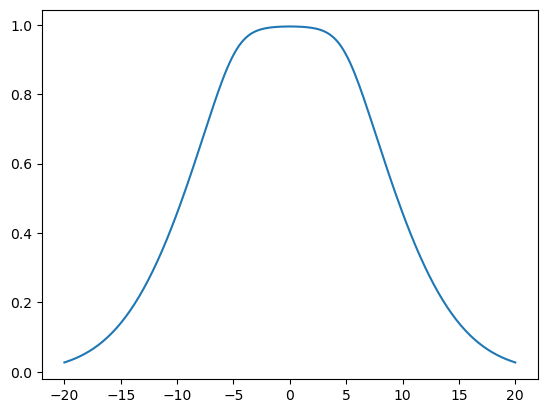

In [10]:
import numpy as np
import matplotlib.pyplot as plt

filename = f"{date}/theta_discr_{nom2[index_last_underscore+1:]}.npz"
theta_discr = np.load(filename)

filename = f"{date}/nu_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz" 
nu0 = np.load(filename)

filename = f"{date}/veff_bord_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz"
veff_bord_discr = np.load(filename)

Temp_bord = 18

plt.plot(theta_discr , nu0 )

def write_triplet_data(x_list, y_list, z_list, filepath="donnees.dat"):
    if not (len(y_list) == len(z_list)):
        raise ValueError("Les listes y et z doivent avoir la même longueur.")

    with open(filepath, "w") as f:
        f.write("x y z\n")  # en-tête facultatif, tu peux le retirer
        for x in x_list : 
            for y, z in zip(y_list, z_list):
                f.write(f"{x} {y} {z}\n")

    print(f"✅ Fichier '{filepath}' écrit avec {len(x_list)} lignes.")

write_triplet_data(theta_discr[::4], theta_discr[::2], nu0[::2], "donnees1.dat")

def save_as_tikz_table(x, y, filename="plot.table"):
    """
    Enregistre les listes x et y dans un fichier .table pour TikZ.
    Format :
    #Curve 0, N points
    #x y type
    x1 y1 i
    x2 y2 i
    ...
    """
    assert len(x) == len(y), "x et y doivent avoir la même longueur"
    n_points = len(x)

    with open(filename, "w") as f:
        f.write(f"#Curve 0, {n_points} points\n")
        f.write("#x y type\n")
        f.write(f"{-9:.5f} {0:.5f} i\n")
        for xi, yi in zip(x, y):
            f.write(f"{xi:.5f} {yi:.5f} i\n")
        f.write(f"{9:.5f} {0:.5f} i\n")

    print(f"✅ Fichier enregistré sous : {filename}")

save_as_tikz_table(theta_discr*8.8/20, nu0*5, filename="insitut.table")
save_as_tikz_table(theta_discr*8.8/20, -nu0*5, filename="insitut_minus.table")

# x y type
-9.00000 0.00000 i
-8.80000 0.13537 i
-8.71156 0.14643 i
-8.62312 0.15790 i
-8.53467 0.17002 i
-8.44623 0.18288 i
-8.35779 0.19655 i
-8.26935 0.21106 i
-8.18090 0.22647 i
-8.09246 0.24281 i
-8.00402 0.26013 i
-7.91558 0.27848 i
-7.82714 0.29790 i
-7.73869 0.31843 i
-7.65025 0.34013 i
-7.56181 0.36303 i
-7.47337 0.38718 i
-7.38492 0.41263 i
-7.29648 0.43942 i
-7.20804 0.46760 i
-7.11960 0.49722 i
-7.03116 0.52833 i
-6.94271 0.56096 i
-6.85427 0.59516 i
-6.76583 0.63098 i
-6.67739 0.66845 i
-6.58894 0.70763 i
-6.50050 0.74854 i
-6.41206 0.79124 i
-6.32362 0.83574 i
-6.23518 0.88210 i
-6.14673 0.93034 i
-6.05829 0.98048 i
-5.96985 1.03257 i
-5.88141 1.08662 i
-5.79296 1.14265 i
-5.70452 1.20068 i
-5.61608 1.26072 i
-5.52764 1.32280 i
-5.43920 1.38690 i
-5.35075 1.45304 i
-5.26231 1.52122 i
-5.17387 1.59142 i
-5.08543 1.66364 i
-4.99698 1.73785 i
-4.90854 1.81405 i
-4.82010 1.89220 i
-4.73166 1.97227 i
-4.64322 2.05423 i
-4.55477 2.13803 i
-4.46633 2.22362 i
-4.37789 2.31094 i
-

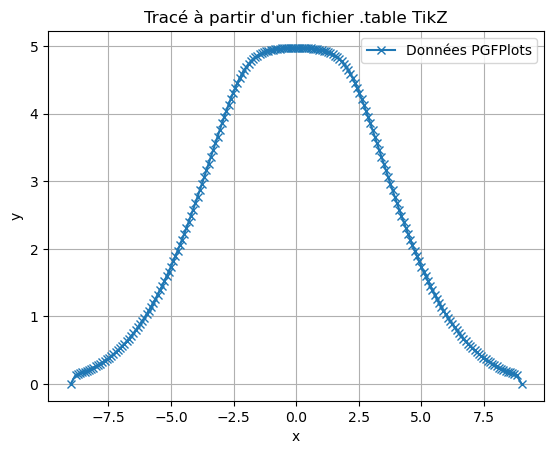

In [12]:
import matplotlib.pyplot as plt

def read_and_plot_table(filename):
    """
    Lit un fichier .table au format TikZ (PGFPlots),
    affiche les données, et trace le graphe.
    """
    x, y,  typ= [], [] , []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('#') or not line.strip():
                continue
            parts = line.strip().split()
            if len(parts) >= 2:
                x.append(float(parts[0]))
                y.append(float(parts[1]))
                typ.append(parts[2])

    # Afficher les données dans le terminal
    print("# x y type")
    for xi, yi , i in zip(x, y , typ):
        print(f"{xi:.5f} {yi:.5f} {i}")

    # Tracer
    plt.plot(x, y, marker='x', linestyle='-', label='Données PGFPlots')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Tracé à partir d'un fichier .table TikZ")
    plt.grid(True)
    plt.legend()
    plt.show()

read_and_plot_table(filename="insitut.table")

/var/folders/sc/1jlhfymx3sg5vz8q1fx87pvr0000gn/T/ipykernel_81863/3627408683.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("donnees1.dat", delim_whitespace=True)


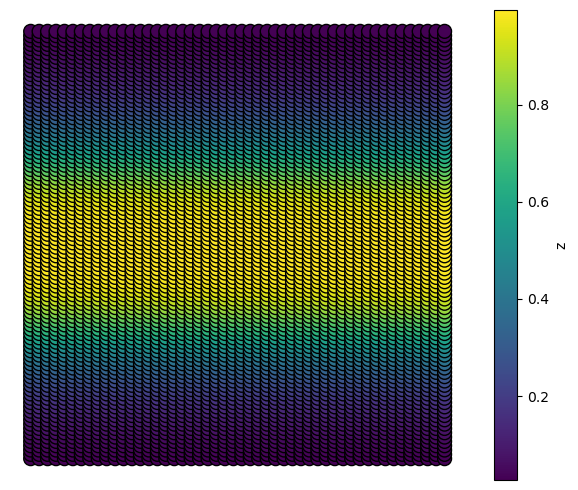

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("donnees1.dat", delim_whitespace=True)

# Extraire x, y, z
x = df['x']
y = df['y']
z = df['z']

# Création de la figure
plt.figure(figsize=(6, 5))
scatter = plt.scatter(x, y, c=z, cmap='viridis', s=100, edgecolor='k')
plt.colorbar(scatter, label='z')
plt.xticks([])  # Pas de graduations sur x
plt.yticks([])  # Pas de graduations sur y
plt.box(False)  # Enlever les bordures de l’axe
plt.tight_layout()
plt.show()


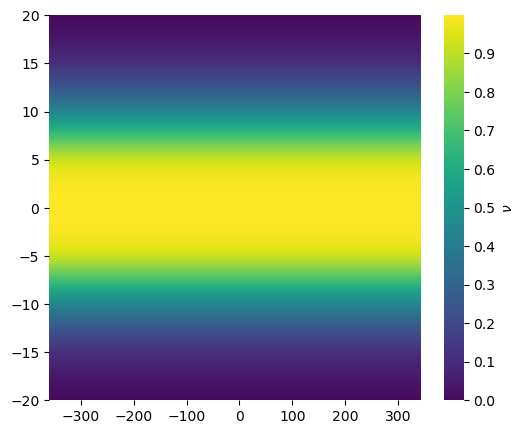

In [16]:
from matplotlib.ticker import FormatStrFormatter

vmin=0
vmax=1
X, Y = np.meshgrid(veff_bord_discr*Temp_bord, theta_discr)
# ➤ Plus de niveaux pour une couleur plus continue
nb_levels = 1000

# Exemple simple
fig, ax = plt.subplots(figsize=(6, 5)) 
cf = ax.contourf( X, Y,   np.array([nu0 for v in veff_bord_discr]).T, levels=nb_levels , cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 1)

# Supprimer les traits noirs autour de la figure
for spine in ax.spines.values():
    spine.set_visible(False)

# Colorbar avec 21 décimales
cbar = plt.colorbar(cf , label= r'$\nu$')
cbar.outline.set_visible(False)
cbar.formatter = FormatStrFormatter('%.1f')
cbar.update_ticks()

# Sauvegarde
plt.savefig("insitut.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

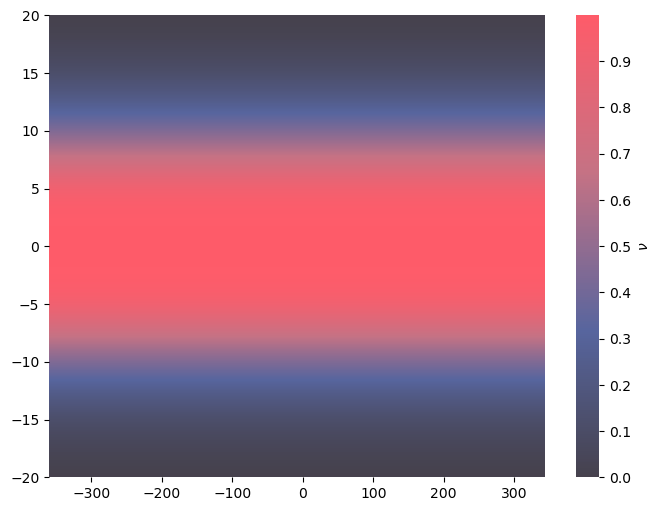

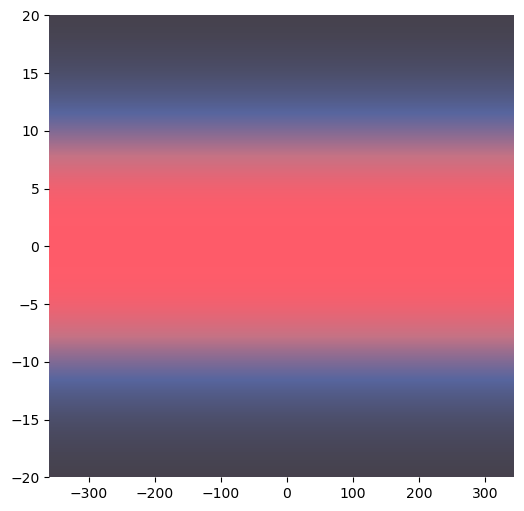

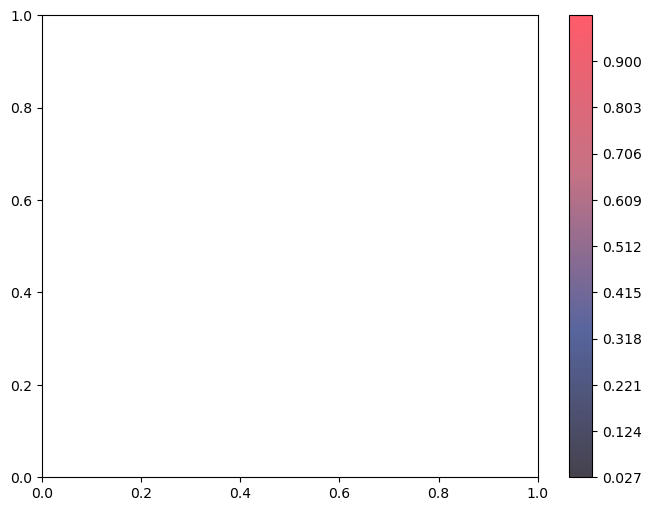

In [84]:
# Définir vmin et vmax pour la colorbar
from matplotlib.colors import LinearSegmentedColormap
# Définition des couleurs HTML
colors = ['#443E46' , '#908CA4' ,  '#57659E', '#F6DEB8' ,  '#C57284', '#FF5B69']  # colorFour → colorFive → colorSix
colors = ['#443E46'  ,  '#57659E' ,   '#C57284' ,'#FF5B69'  ]
#\definecolor{colorOne}{HTML}{443E46}
#\definecolor{colorTwo}{HTML}{F6DEB8}
#\definecolor{colorThree}{HTML}{908CA4}
#\definecolor{colorFour}{HTML}{57659E}
#\definecolor{colorFive}{HTML}{C57284}
#\definecolor{colorSix}{HTML}{FF5B69}
# Création du colormap continu
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

vmin = 0
vmax = 1

# Créer les maillages X et Y
X, Y = np.meshgrid(veff_bord_discr * Temp_bord, theta_discr)

# Définir les niveaux pour un contour plus continu
nb_levels = 1000

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 6))

# Créer un graphique de contours
cf = ax.contourf(X, Y, np.array([nu0 for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)

# Supprimer les traits noirs autour de la figure
for spine in ax.spines.values():
    spine.set_visible(False)

# Ajouter la barre de couleur avec 1 décimale
cbar = plt.colorbar(cf, ax=ax, label=r'$\nu$')
cbar.outline.set_visible(False)
cbar.formatter = FormatStrFormatter('%.1f')
cbar.update_ticks()

# Sauvegarder le graphique complet avec les axes et la colorbar
fig.savefig("complete_graph_insitut.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder les axes sans le graphique ni la colorbar
fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
ax_axes.contourf(X, Y, np.array([nu0 for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
#ax_axes.set_axis_off()  # Masquer les axes
# Supprimer les traits noirs autour de la figure
for spine in ax_axes.spines.values():
    spine.set_visible(False)
fig_axes.savefig("graph_insitut_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder la colorbar seule
fig_cbar, ax_cbar = plt.subplots(figsize=(8, 6))
cbar = plt.colorbar(cf, ax=ax_cbar)
fig_cbar.savefig("colorbar_insitut_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Afficher la figure
plt.show()

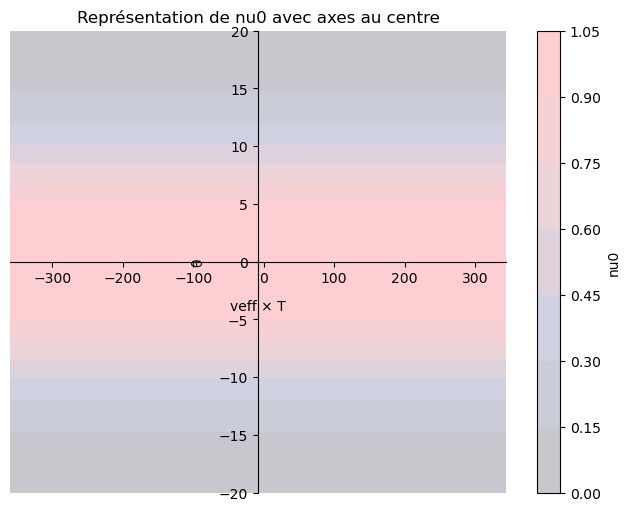

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données (à adapter aux tiennes)
# veff_bord_discr = np.linspace(-1, 1, 50)
# theta_discr = np.linspace(-np.pi, np.pi, 50)
# Temp_bord = 1.0
# nu0 = np.random.rand(len(theta_discr), len(veff_bord_discr))

vmin = 0
vmax = 1

X, Y = np.meshgrid(veff_bord_discr * Temp_bord, theta_discr)

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y,np.array([nu0 for v in veff_bord_discr]).T, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
plt.colorbar(contour, ax=ax, label='nu0')

# Déplacement des axes au centre
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Cache les axes du haut et de droite
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Déplace les ticks des axes vers le centre
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Labels
ax.set_xlabel("veff × T", labelpad=10)
ax.set_ylabel("θ", labelpad=10)
ax.set_title("Représentation de nu0 avec axes au centre")

plt.show()


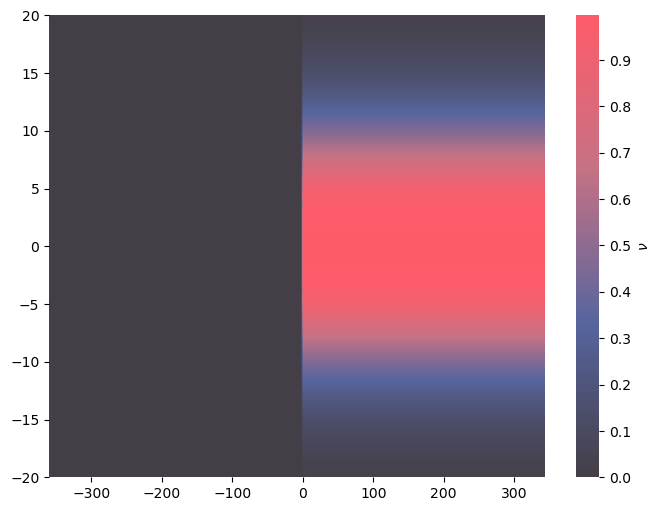

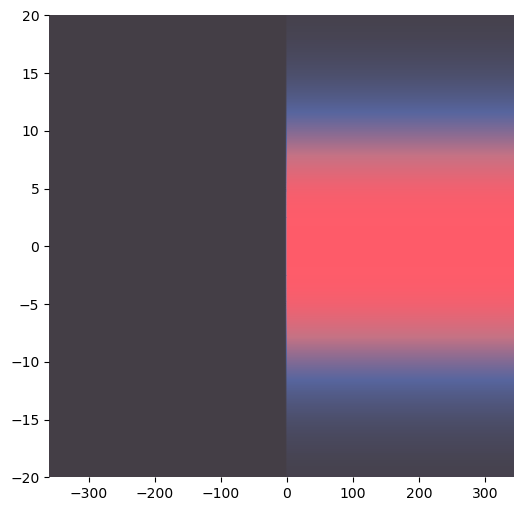

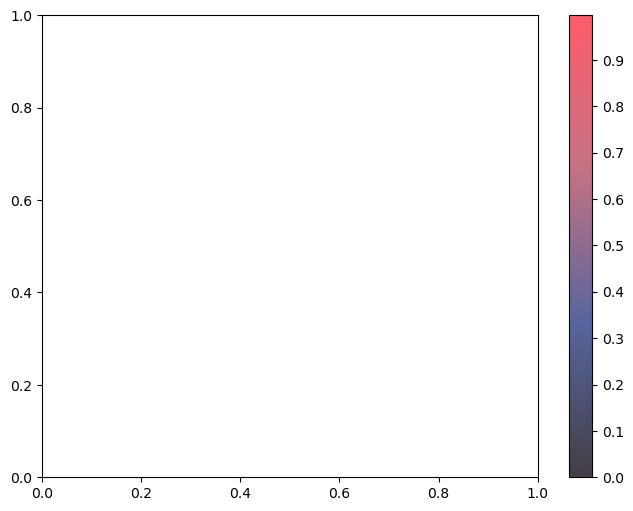

In [88]:
# Définir vmin et vmax pour la colorbar
vmin = 0
vmax = 1

# Créer les maillages X et Y
X, Y = np.meshgrid(veff_bord_discr * Temp_bord, theta_discr)

# Définir les niveaux pour un contour plus continu
nb_levels = 1000

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 6))

# Créer un graphique de contours
cf = ax.contourf(X, Y, np.array([nu0 if v > 0 else np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)

# Supprimer les traits noirs autour de la figure
for spine in ax.spines.values():
    spine.set_visible(False)

# Ajouter la barre de couleur avec 1 décimale
cbar = plt.colorbar(cf, ax=ax, label=r'$\nu$')
cbar.outline.set_visible(False)
cbar.formatter = FormatStrFormatter('%.1f')
cbar.update_ticks()

# Sauvegarder le graphique complet avec les axes et la colorbar
fig.savefig("complete_graph_coupure_1_0.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder les axes sans le graphique ni la colorbar
fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
ax_axes.contourf(X, Y, np.array([nu0 if v > 0 else np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
#ax_axes.set_axis_off()  # Masquer les axes
# Supprimer les traits noirs autour de la figure
for spine in ax_axes.spines.values():
    spine.set_visible(False)
fig_axes.savefig("graph_coupure_1_0_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder la colorbar seule
fig_cbar, ax_cbar = plt.subplots(figsize=(8, 6))
cbar = plt.colorbar(cf, ax=ax_cbar)
fig_cbar.savefig("colorbar_coupure_1_0_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Afficher la figure
plt.show()

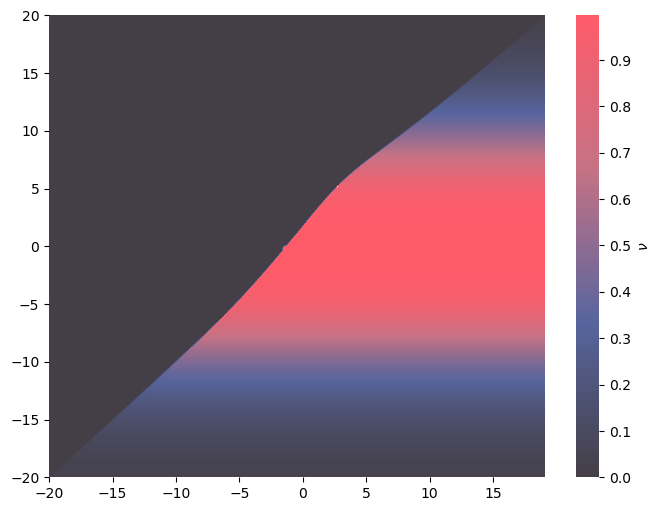

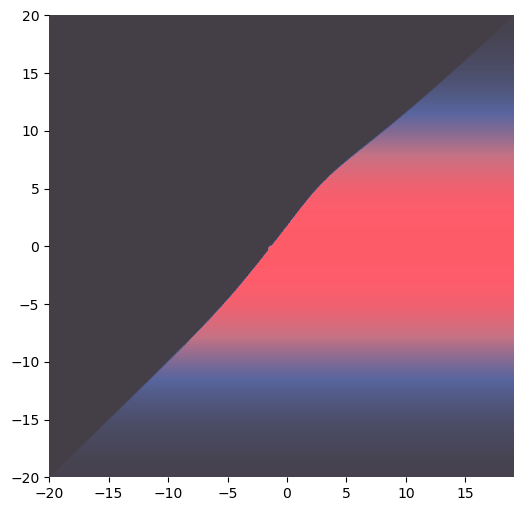

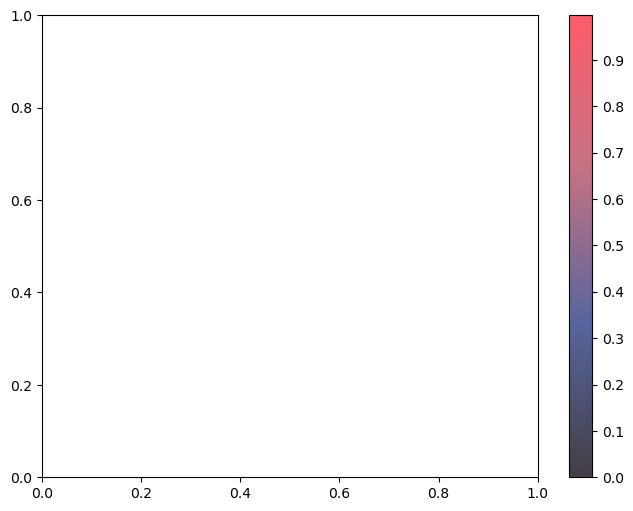

✅ Fichier enregistré sous : coupure_1_sur_18.table
# x y type
-9.00000 0.00000 i
-8.80000 0.13537 i
-8.71156 0.14643 i
-8.62312 0.15790 i
-8.53467 0.17002 i
-8.44623 0.18288 i
-8.35779 0.19655 i
-8.26935 0.21106 i
-8.18090 0.22647 i
-8.09246 0.24281 i
-8.00402 0.26013 i
-7.91558 0.27848 i
-7.82714 0.29790 i
-7.73869 0.31843 i
-7.65025 0.34013 i
-7.56181 0.36303 i
-7.47337 0.38718 i
-7.38492 0.41263 i
-7.29648 0.43942 i
-7.20804 0.46760 i
-7.11960 0.49722 i
-7.03116 0.52833 i
-6.94271 0.56096 i
-6.85427 0.59516 i
-6.76583 0.63098 i
-6.67739 0.66845 i
-6.58894 0.70763 i
-6.50050 0.74854 i
-6.41206 0.79124 i
-6.32362 0.83574 i
-6.23518 0.88210 i
-6.14673 0.93034 i
-6.05829 0.98048 i
-5.96985 1.03257 i
-5.88141 1.08662 i
-5.79296 1.14265 i
-5.70452 1.20068 i
-5.61608 1.26072 i
-5.52764 1.32280 i
-5.43920 1.38690 i
-5.35075 1.45304 i
-5.26231 1.52122 i
-5.17387 1.59142 i
-5.08543 1.66364 i
-4.99698 1.73785 i
-4.90854 1.81405 i
-4.82010 1.89220 i
-4.73166 1.97227 i
-4.64322 2.05423 i
-4.5547

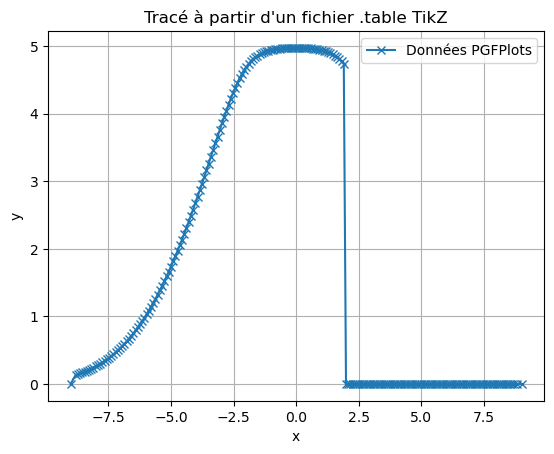

In [116]:
# Définir vmin et vmax pour la colorbar
import numpy as np
from scipy.interpolate import interp1d
# Fonction d'interpolation linéaire
def LinearInterpolation(x, y):
    return interp1d(x, y, kind='linear', fill_value="extrapolate")
    
theta_veff_fun = LinearInterpolation(veff_bord_discr, theta_discr) 
nu_fun = LinearInterpolation(theta_discr , nu0)
mat_nu = np.array([ np.where(  theta_discr <theta_veff_fun(v),  nu0 , 0 ) for v in veff_bord_discr])

vmin = 0
vmax = 1

# Créer les maillages X et Y
X, Y = np.meshgrid(veff_bord_discr , theta_discr)

# Définir les niveaux pour un contour plus continu
nb_levels = 1000

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 6))

# Créer un graphique de contours
cf = ax.contourf(X, Y, mat_nu.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)

# Supprimer les traits noirs autour de la figure
for spine in ax.spines.values():
    spine.set_visible(False)

# Ajouter la barre de couleur avec 1 décimale
cbar = plt.colorbar(cf, ax=ax, label=r'$\nu$')
cbar.outline.set_visible(False)
cbar.formatter = FormatStrFormatter('%.1f')
cbar.update_ticks()

# Sauvegarder le graphique complet avec les axes et la colorbar
fig.savefig("complete_graph_coupure_1_18.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder les axes sans le graphique ni la colorbar
fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
ax_axes.contourf(X, Y, mat_nu.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
#ax_axes.set_axis_off()  # Masquer les axes
# Supprimer les traits noirs autour de la figure
for spine in ax_axes.spines.values():
    spine.set_visible(False)
fig_axes.savefig("graph_coupure_1_18_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder la colorbar seule
fig_cbar, ax_cbar = plt.subplots(figsize=(8, 6))
cbar = plt.colorbar(cf, ax=ax_cbar)
fig_cbar.savefig("colorbar_coupure_1_18_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Afficher la figure
plt.show()


save_as_tikz_table(theta_discr*8.8/20, np.array([nu0[i] if theta < 5/2.23*2 else 0 for i, theta in enumerate(theta_discr)])*5 , filename="coupure_1_sur_18.table")
read_and_plot_table(filename="coupure_1_sur_18.table")

🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2025-01-27/density_expansion_nu_theta_edge_1.0_ih1_64.676_559.424_veff_bord.npz" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/Domain_Wall_Dynamics_for_a_1D_Bose_ga/Figures/data/2025-01-27/density_expansion_nu_theta_edge_1.0_ih1_64.676_559.424_veff_bord.npz"
receiving file list ... 
1 file to consider

sent 16 bytes  received 178 bytes  77.60 bytes/sec
total size is 3.28K  speedup is 16.91
✅ Fichier enregistré sous : density_coupure_1_sur_18.table
✅ Fichier enregistré sous : density_coupure_1_18.table


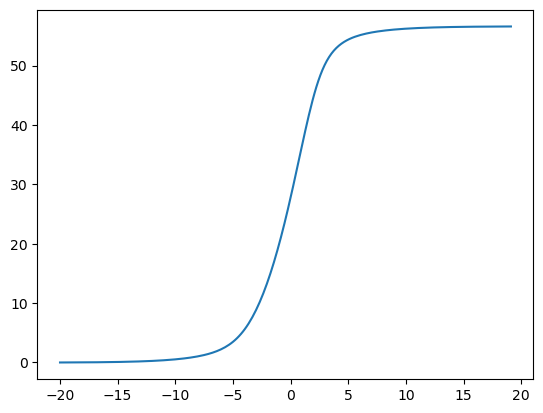

In [90]:
# density_expansion_nu
filename = f"{date}/density_expansion_nu_{nom1}_{mu:.3f}_{T:.3f}_veff_bord.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
mudensity = np.load(filename)

plt.plot(mudensity[0,:] , mudensity[1,:])

def save_as_tikz_table(x, y, filename="plot.table"):
    """
    Enregistre les listes x et y dans un fichier .table pour TikZ.
    Format :
    #Curve 0, N points
    #x y type
    x1 y1 i
    x2 y2 i
    ...
    """
    assert len(x) == len(y), "x et y doivent avoir la même longueur"
    n_points = len(x)

    with open(filename, "w") as f:
        f.write(f"#Curve 0, {n_points} points\n")
        f.write("#x y type\n")
        f.write(f"{-9:.5f} {0:.5f} i\n")
        for xi, yi in zip(x, y):
            f.write(f"{xi:.5f} {yi:.5f} i\n")
        f.write(f"{9:.5f} {0:.5f} i\n")

    print(f"✅ Fichier enregistré sous : {filename}")

save_as_tikz_table(mudensity[0,:]*8.8/20, mudensity[1,:]*5/56 , filename="density_coupure_1_sur_18.table")
save_as_tikz_table(mudensity[0,:]*8.8/20*Temp_bord, mudensity[1,:]*5/56 , filename="density_coupure_1_18.table")

In [91]:
import numpy as np

# Définir les constantes
hbar = 1.05457182e-25   # um^2.kg/ms
mass =  1.44e-25        # kg (masse du Rubidium 87)
kB = 1.380649e-26       # um^2.ms^-2.kg.nK^{-1}
a3D = 5.3e-3            # um
om_perp = 2 * np.pi * 2.56  # kHz (fréquence transverse)

# Calculer les constantes dérivées
g = 2 * hbar * a3D * om_perp        # force de répulsion effective 1D
c = mass / hbar**2 * g              # um^{-1}
gbar = g / hbar

print(gbar)

0.17050051649562528


In [93]:
import numpy as np
from scipy.linalg import solve
from scipy.interpolate import interp1d
from scipy.sparse import diags
from scipy.sparse.linalg import inv

# -------------------------------------------------------------------------------------
# Dressing of function f (given as array f_discr, occupation ratio given as n_discr)
# -------------------------------------------------------------------------------------

def f_varphimat(lam_discr, gb):
    L = len(lam_discr)
    def varphi(lam):
        return 2 * gb / (gb**2 + lam**2)
    
    varphimat = np.zeros((L, L))
    
    for i in range(L):
        for j in range(i + 1):
            value = varphi(lam_discr[i] - lam_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value
    
    return varphimat

def f_dlam(lam_discr):
    L = len(lam_discr)
    dlam = np.zeros(L)
    for i in range(1, L - 1):
        dlam[i] = 0.5 * (lam_discr[i + 1] - lam_discr[i - 1])
    dlam[0] = 0.5 * (lam_discr[1] - lam_discr[0])
    dlam[-1] = 0.5 * (lam_discr[-1] - lam_discr[-2])
    return dlam

def dress(gb, lam_discr, n_discr, f_discr):
    varphimat = f_varphimat(lam_discr, gb)
    dlam = f_dlam(lam_discr)
    A = np.eye(len(lam_discr)) - (0.5 / np.pi) * varphimat @ np.diag(n_discr) @ np.diag(dlam)
    return solve(A, f_discr)

# -------------------------------------------------------------------------------------
# To evaluate charge density associated with function f
# -------------------------------------------------------------------------------------

def charge_density(gb, lam_discr, n_discr, f_discr):
    L = len(lam_discr)
    def varphi(lam):
        return 2 * gb / (gb**2 + lam**2)

    #lam_discr_g = np.linspace((lam_discr[0]*3 - lam_discr[-1])/2 , lam_discr[0], int(L/2))
    #lam_discr_d = np.linspace(lam_discr[-1], (lam_discr[-1]*3 - lam_discr[0])/2 int(L/2))
    #lam_discr_exp = np.concatenate([lam_discr_g ,lam_discr , lam_discr_d]) 
    #lam_discr_exp = np.linspace((lam_discr[0]*3 - lam_discr[-1])/2, (lam_discr[-1]*3 - lam_discr[0])/2,  2*L ))
    lam_discr_exp = np.linspace( lam_discr[0], lam_discr[-1]*2 - lam_discr[0],  2*L )
    varphimat = np.zeros((2*L, 2*L))
    for i in range(L):
        for j in range(i + 1):
            value = varphi(lam_discr[i] - lam_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value
    
    dlam_exp = f_dlam(lam_discr_exp)
    zeros_array = np.array([0] * L)
    n_discr_exp = np.concatenate([n_discr, zeros_array], axis=0)
    A = np.eye(2*L) - (0.5 / np.pi) * varphimat @ np.diag(n_discr_exp) @ np.diag(dlam_exp)
    f_discr_exp = np.ones(2*L)
    dressed_f = solve(A, f_discr_exp)[:L]
    dlam = f_dlam(lam_discr)
    return (0.5 / np.pi) * np.dot(dlam, np.diag(n_discr) @ dressed_f)

# -------------------------------------------------------------------------------------
# Solve Yang-Yang equation
# -------------------------------------------------------------------------------------

def fun1(z):
    if z > 0:
        return np.log(1 + np.exp(-z))
    else:
        return np.log(1 + np.exp(z)) - z

def fun2(z):
    if z < 0:
        return 1 / (1 + np.exp(z))
    else:
        return np.exp(-z) / (1 + np.exp(-z))

def yangyang(gb, beta, lam_discr):
    L = len(lam_discr)
    def varphi(lam):
        return 2 * gb / (gb**2 + lam**2)
    
    varphimat = np.zeros((L, L))
    for i in range(L):
        for j in range(i + 1):
            value = varphi(lam_discr[i] - lam_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value
    
    dlam = f_dlam(lam_discr)
    bare_E = 0.5 * beta[2] * lam_discr**2 + beta[1] * lam_discr + beta[0]
    eps = bare_E.copy()
    n = np.array([fun2(e) for e in eps])
    
    diff = 1.0
    while diff > 1e-12:
        old_n = n.copy()
        eps = bare_E - (0.5 / np.pi) * varphimat @ np.diag([fun1(e) for e in eps]) @ dlam
        n = np.array([fun2(e) for e in eps])
        diff = np.linalg.norm(n - old_n)
    
    eps = bare_E - (0.5 / np.pi) * varphimat @ np.diag([fun1(e) for e in eps]) @ dlam
    n = np.array([fun2(e) for e in eps])
    return n

import numpy as np
from scipy.interpolate import interp1d

def eval_density(x1, x2, gb, theta_tab, n_fun, ratio_m_hbar):
    L = len(x1)
    dens = np.zeros((2, 2 * L))  # Matrice de densité
    
    # Interpolation/extrapolation pour x2
    f2 = interp1d(x2, theta_tab, kind='linear', fill_value="extrapolate")
    
    # Interpolation/extrapolation pour x1
    f1 = interp1d(x1, theta_tab, kind='linear', fill_value="extrapolate")
    
    # La densité pour les premiers et derniers points est zéro
    dens[0, 0] = x1[0]
    dens[1, 0] = 0
    dens[0, L] = x2[-1]
    dens[1, L] = 0
    
    # Calcul des densités pour x1
    for j in range(1, L):  # Parcours de 1 à L-1 (équivalent Julia 2:L)
        thet1 = theta_tab[j]
        if x1[j] < x2[0]:
            thet2 = theta_tab[0]
        else:
            thet2 = f2(x1[j])
        
        lam_discr = np.linspace(thet2, thet1, 600)  # LinRange équivalent
        n_discr = n_fun(lam_discr)
        
        dens[0, j] = x1[j]
        dens[1, j] = ratio_m_hbar * charge_density(gb, lam_discr, n_discr, np.ones(len(lam_discr)))
    
    # Calcul des densités pour x2 sans symétrie
    for j in range(L - 1):  # Parcours de 0 à L-2 (équivalent Julia 1:L-1)
        thet1 = theta_tab[j]
        if x2[j] > x1[-1]:
            thet2 = theta_tab[-1]
        else:
            thet2 = f1(x2[j])
        
        lam_discr = np.linspace(thet1, thet2, 600)  # LinRange équivalent
        n_discr = n_fun(lam_discr)
        
        dens[0, 2 * L - 1 - j] = x2[j]
        dens[1, 2 * L - 1 - j] = ratio_m_hbar * charge_density(gb, lam_discr, n_discr, np.ones(len(lam_discr)))
    
    # Trier les densités selon les positions
    sorted_indices = np.argsort(dens[0, :])
    dens_sorted = dens[:, sorted_indices]
    
    return dens_sorted

import numpy as np

def eval_edge_density(x, gb, theta_tab, nu_fun, ratio_m_hbar):
    npts_integral = 600

    L = len(x)
    dens = np.zeros((2, L))
    dens[0, 0] = x[0]
    dens[1, 0] = 0
    thet1 = theta_tab[0]

    for j in range(1, L):
        thet1 = theta_tab[j]
        thet2 = theta_tab[0]
        lam_discr = np.linspace(thet2, thet1, npts_integral)
        nu_discr = np.array([nu_fun(lam) for lam in lam_discr])
        dens[0, j] = x[j]
        dens[1, j] = ratio_m_hbar * charge_density(gb, lam_discr, nu_discr, np.ones(len(lam_discr)))

    print("la densité haute est :", dens[1, -1])

    # tri selon les positions x
    indices_sorted = np.argsort(dens[0, :])
    return dens[:, indices_sorted]


In [94]:
import numpy as np
from scipy.interpolate import interp1d

index_last_underscore = nom2.rfind('_')
theta_discr = np.load(f"{date}/theta_discr_{nom2[index_last_underscore+1:]}.npz")

filename = f"{date}/density_expansion_nu_{nom1}_{mu:.3f}_{T:.3f}_veff_bord.npz"
print ( 'filename =' ,filename )
x_bord , y_bord = np.load(filename)

Temp_bord = 18

# Fonction d'interpolation linéaire
def LinearInterpolation(x, y):
    return interp1d(x, y, kind='linear', fill_value="extrapolate")

# Interpolation linéaire
x_fun = LinearInterpolation(theta_discr, x_bord)  # Unité (µm/ms)
theta_fun = LinearInterpolation(x_bord, theta_discr)

# Calcul des limites x1 et x2
x_1 = (x0 - Taille / 2) / Temp_bord
x_2 = (x0 + Taille / 2) / Temp_bord

# Calcul des valeurs theta_1 et theta_2
theta_1 = theta_fun(x_1)
theta_2 = theta_fun(x_2)

# Calcul du maximum de |theta_1| et |theta_2|
max_abs_theta = max(20, abs(theta_1), abs(theta_2))

# Génération des bords pour theta_bord1 et theta_bord2
theta_bord1 = np.linspace(-max_abs_theta, theta_1, 100)
x1_bord1 = np.full(theta_bord1.shape, x_1)

# Génération de theta_bord2 et calcul de x1_bord2
theta_bord2 = np.linspace(theta_1 + 0.0000001, theta_2, 100)
L = len(theta_bord2)
x1_bord2 = np.zeros(L)

for i in range(L):
    x1_bord2[i] = x_fun(theta_bord2[i])

# Concaténation des bords pour theta_discr et x1
theta_discr_exp = np.concatenate([theta_bord1, theta_bord2], axis=0)
x1 = np.concatenate([x1_bord1, x1_bord2], axis=0) * Temp_bord/ Taille

# Calcul de x2
x2 = np.full(theta_discr.shape, x_2) * Temp_bord/ Taille

# Affichage des résultats (facultatif)
#print("theta_discr_exp:", theta_discr_exp)
#print("x1:", x1)
#print("x2:", x2)


filename = 2025-01-27/density_expansion_nu_theta_edge_1.0_ih1_64.676_559.424_veff_bord.npz


In [95]:
import numpy as np

def integ(x, y, tab, axes=(0,)):
    """
    Calcule l'intégrale discrète sur une ou plusieurs dimensions.

    Parameters:
    - x: numpy array, coordonnées discrètes de la première dimension.
    - y: numpy array, coordonnées discrètes de la deuxième dimension (ou autre).
    - tab: numpy array, tableau de valeurs à intégrer.
    - axes: tuple of int, axes sur lesquels effectuer l'intégration.

    Returns:
    - Résultat de l'intégration (scalaire ou tableau réduit).
    """
    # Assurez-vous que les axes sont sous forme de tuple
    if isinstance(axes, int):
        axes = (axes,)

    # Intégration séquentielle sur les axes spécifiés
    result = tab.copy()
    for axis in sorted(axes):
        if axis == 0:
            dx = np.diff(x)  # Différences des x
            weights = np.append(dx, dx[-1])  # Ajouter le dernier poids pour le bord
            result = np.sum(result * weights[:, None], axis=axis)  # Poids le long de l'axe 0
        elif axis == 1:
            dy = np.diff(y)  # Différences des y
            weights = np.append(dy, dy[-1])  # Ajouter le dernier poids pour le bord
            result = np.sum(result * weights[None, :], axis=axis)  # Poids le long de l'axe 1

    return result
    
filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
print ( 'filename =' ,filename )
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
bord1 = np.load(filename)
filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
print ( 'filename =' ,filename )
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
bord2 = np.load(filename)

def f_mat_nu_bord(v , theta , veff_bord_discr = veff_bord_discr , theta_discr = theta_discr , nu = nu0 , v1 = bord1*Taille/Temp_bord , v2 = bord2*Taille/Temp_bord , theta_discr_exp = theta_discr_exp ) :
    
    import numpy as np
    from scipy.interpolate import RegularGridInterpolator
    from scipy.interpolate import interp1d
    
    f_nu = interp1d(theta_discr, nu , kind='linear', bounds_error=False, fill_value="extrapolate")
    f_theta_discr_exp_1 = interp1d(v1, theta_discr_exp, kind='linear', bounds_error=False, fill_value="extrapolate")
    f_theta_discr_exp_2 = interp1d(v2, theta_discr_exp, kind='linear', bounds_error=False, fill_value="extrapolate")

    v_min = min(np.min ( v1 ) ,np.min ( v2)) 
    v_max = min(np.max ( v1 ) ,np.max ( v2))

    if v < v_min or v > v_max : return 0

    theta_min = min(theta_discr)
    theta_max = f_theta_discr_exp_1(v)
    if v < min(v2)  :        
        if theta > theta_max : return 0 
        return f_nu(theta) 
    else : 
        theta_min = f_theta_discr_exp_2(v)
        theta_min = f_theta_discr_exp_2(v)
        if (theta < theta_min) or (theta > theta_max) : return 0 
        return f_nu(theta) 

filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz


[True, False, False, False, False, False, False]
filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz


Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


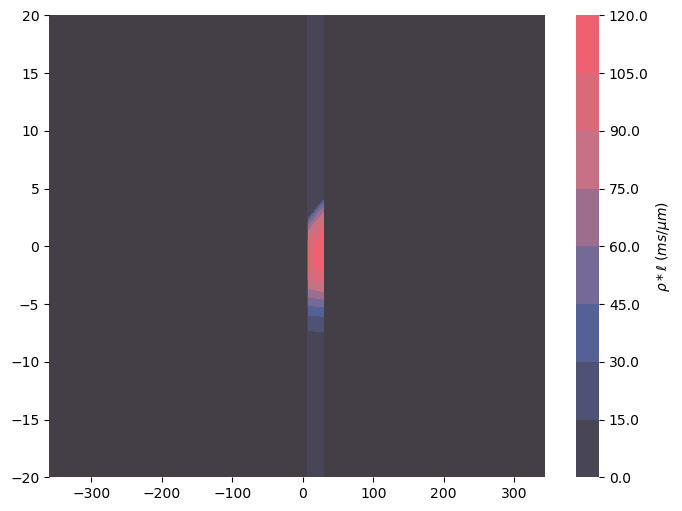

Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


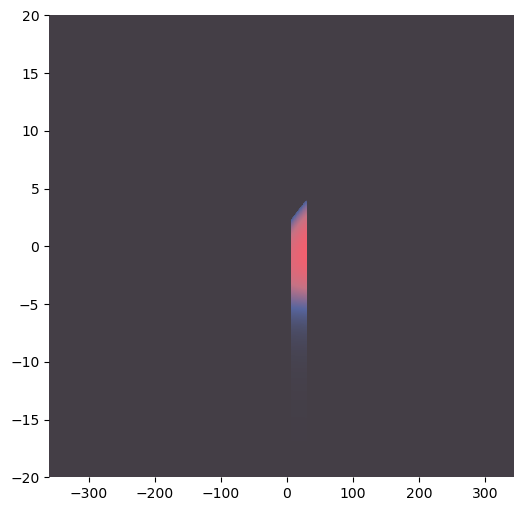

✅ Fichier enregistré sous : density_coupure_2_0.table
✅ Fichier enregistré sous : Pi_coupure_2_0.table
filename = 2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz
✅ Fichier enregistré sous : rho_coupure_2_0.table


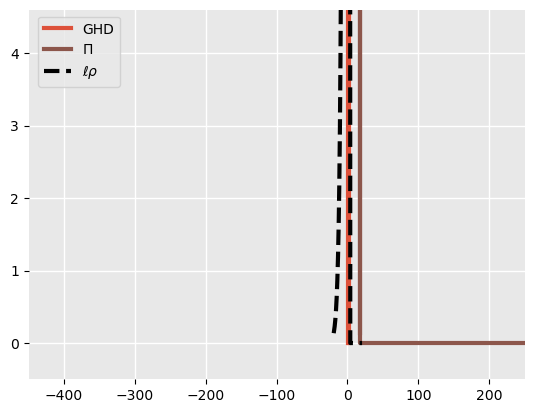

In [130]:
PI , GHD , N  = [] , [] , [] 
liste_t = np.array([0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ])
mask = (liste_t >= 0) & (liste_t <= 30)
mask = [ t in np.array([0.000]) for t in liste_t ]
print(mask)

##mat_nu_1 = np.array([
#        np.array([f_mat_nu_bord(v, theta , v1 = veff_bord_discr_exp_2 , v2 =  0.00001*theta_discr_exp +veff_bord_discr_exp_2[-1]   ) for theta in theta_discr_exp_2])
#        for v in veff_bord_discr_exp_2
#    ]) 

mat_rho = np.array([0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr, nu, np.ones(len(theta_discr))) for nu in mat_nu ]  )

# theta_discr_exp
filename = f"{date}/theta_discr_exp_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
theta_discr_exp = np.load(filename)
Temps_exp = 30

for t in liste_t[mask] :
    filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    bord1 = np.load(filename)
    filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    bord2 = np.load(filename)
    
    veff_bord_discr_exp_2 = np.linspace(min(bord1[0] , bord2[0]) , max(bord2[-1] , bord1[-1]), 200)*Taille/Temp_bord
    theta_discr_exp_2 = np.linspace(theta_discr[0] , theta_discr[-1], 600)
    mat_nu_bord = np.array([
        np.array([f_mat_nu_bord(v, theta , v1 = bord1*Taille/Temp_bord , v2 = bord2*Taille/Temp_bord ) for theta in theta_discr_exp_2])
        for v in veff_bord_discr_exp_2
    ])  
    #vmin=0
    #vmax=1
    X0, Y0 = np.meshgrid(veff_bord_discr*Temp_bord, theta_discr)
    #plt.contourf( X0, Y0,   np.array([nu0 for v in veff_bord_discr]).T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    #plt.contourf( X0, Y0,   mat_nu.T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    X, Y = np.meshgrid(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2)
    #plt.contourf( X, Y,   mat_nu_bord.T, cmap='viridis' , vmin=vmin, vmax=vmax, alpha = 0.5)
    #plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    #plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.show()

    #plt.plot(veff_bord_discr*Temp_bord , theta_veff_fun(veff_bord_discr) , label = "veff" )
    
    #plt.plot(bord1*Taille, theta_discr_exp)
    #plt.plot(bord2*Taille , theta_discr_exp)
    #plt.plot(np.concatenate([bord1, np.flip(bord2)] , axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    #plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"$\mu m/ms$")
    #plt.legend()
    #plt.show()

    fig, ax = plt.subplots(figsize=(8, 6))

    mat_rho_bord = np.array([0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr_exp_2, nu, np.ones(len(theta_discr_exp_2))) for nu in mat_nu_bord ]  )
    nb_levels = 1000
    vmin, vmax = 0 , 5.6*Taille

    # Créer un graphique de contours
    #cf0 = ax.contourf(X0, Y0, mat_rho.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
    cf0 = ax.contourf(X0, Y0, np.array([np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
    #cf0 = ax.contourf(X0, Y0, mat_rho.T*Taille, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.2)
    cf = ax.contourf( X, Y,   mat_rho_bord.T*Taille, cmap=custom_cmap , vmin=vmin, vmax=vmax , alpha = 1)

    # Supprimer les traits noirs autour de la figure
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Ajouter la barre de couleur avec 1 décimale
    cbar = plt.colorbar(cf, ax=ax, label=r'$\rho*\ell~ (ms/\mu m)$')
    cbar.outline.set_visible(False)
    cbar.formatter = FormatStrFormatter('%.1f')
    cbar.update_ticks()
    
    # Sauvegarder le graphique complet avec les axes et la colorbar
    fig.savefig(f"complete_graph_coupure_2_{t:.0f}.pdf", dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    
    # Sauvegarder les axes sans le graphique ni la colorbar
    fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
    #ax_axes.contourf(X0, Y0, mat_rho.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
    ax_axes.contourf(X0, Y0, np.array([np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)    
    #ax_axes.contourf(X0, Y0, mat_rho.T*Taille, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.2)    
    ax_axes.contourf(X, Y, mat_rho_bord.T*Taille, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
    #ax_axes.set_axis_off()  # Masquer les axes
    # Supprimer les traits noirs autour de la figure
    for spine in ax_axes.spines.values():
        spine.set_visible(False)
    fig_axes.savefig(f"graph_coupure_2_{t:.0f}_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

    #plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    #plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.plot(np.concatenate([bord1, np.flip(bord2)], axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    #plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"$\mu m/ms$")
    #plt.legend()
    plt.show()





    #Pi = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,))
    #Ghd = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(1,))
    #nat = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,1))

    #PI.append(Pi)
    #GHD.append(Ghd)
    #N.append(nat)

    #plt.plot(theta_discr_exp_2 , Pi , label = f"Pi : {t:.3f}") 
    #for i , rho in enumerate(mat_rho_bord) :
    #    plt.plot(theta_discr_exp_2 , rho , label = f"rho : {i:.3f}") 
    #plt.xlabel(r"$\mu m/ms$")
    #plt.ylabel(r"$ms/\mu m$")
    #plt.legend()
    #plt.show()

    #plt.plot(veff_bord_discr_exp_2 , Ghd , label = f"GHD : {t:.3f}") 
    #plt.xlabel(r"$\mu m/ms$")
    #plt.ylabel(r"${\mu m}^{-1}$")
    #plt.legend()
    #plt.show()

    #plt.plot(theta_discr_exp_2*liste_t[-1]+x0, PI[0]/liste_t[-1] , label = f"Pi : {0:.3f}") 
    #plt.plot(veff_bord_discr_exp_2*Temp_bord, Ghd , label = f"Ghd : {t:.3f}") 
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"${\mu m}^{-1}$")
    #plt.legend()
    #plt.show()

    
    fig, ax1 = plt.subplots()
    
    label = r"GHD"
    filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    density = np.load(filename)    
    # Créer un nouvel intervalle allant de 0 à 400
    #x_new = np.linspace(max(density[0, :] * Taille) , 400, 100)  # 100 points entre 0 et 400
    #y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
    # Concaténer avec tes données existantes
    x_combined = density[0, :] * Taille/Temp_bord # np.concatenate([density[0, :] * Taille  , x_new])
    y_combined = density[1, :]# np.concatenate([density[1, :] , y_new])

    save_as_tikz_table(x_combined*8.8/20, y_combined*5/56 , filename=f"density_coupure_2_{t:.0f}.table")
    
    ax1.plot(x_combined, y_combined, linewidth=3, color=plt.cm.inferno(0.6), alpha=1,
         label=label)
    
    label = r"$\Pi$"
    index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
       
    x_new = np.linspace(max(theta_discr_exp*t +x0) , 400, 100)  # 100 points entre 0 et 400
    y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
    filename = f"{date}/Pi_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    Pi_0 = np.load(filename) * Taille
    # Concaténer avec tes données existantes
    x_combined = np.concatenate([theta_discr_exp*t +x0, x_new])
    y_combined = np.concatenate([Pi_0, y_new])

    save_as_tikz_table(x_combined*8.8/20, y_combined*5/56 , filename=f"Pi_coupure_2_{t:.0f}.table")
    
    ax1.plot(x_combined,  y_combined, linewidth=3, color="#8c564b",alpha=1, 
             label=label)

    
    label = r"$\ell\rho$"
    
    index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
    filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    filename = f"{date}/rho_bon_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    rho_theta_star_discr = np.load(filename)['arr_0']
    
    filename = f"{date}/theta_discr_exp_2_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    #filename = '2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz' 
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    theta_discr_exp_2 = np.load(filename)['arr_0']
       
    #theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 =  x0/Temps_exp

    save_as_tikz_table((theta_discr_exp_2+theta0)*8.8/20, rho_theta_star_discr*Taille*5/56 , filename=f"rho_coupure_2_{t:.0f}.table")
    
    ax1.plot(theta_discr_exp_2+theta0, 
             rho_theta_star_discr*Taille , 
             linewidth=3 , 
             linestyle='--',
             alpha=1,
             color = "black",#"#bcbd22", 
             label=label)
    
    plt.ylim([-0.5 , 4.6 ])
    plt.xlim([-450, 250 ])    
    plt.grid(True)
    #plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    #plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    # Personnalisation de la légende
    ax1.legend(
        #loc='upper left',             # Position de la légende
        loc='upper left',
        #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
        #loc='best', 
        bbox_to_anchor=(0.005, 1),
        #fancybox=False,                  # Ajouter une bordure arrondie
        #shadow=False,                    # Ajouter une ombre
        #ncol=1,                         # Nombre de colonnes pour les entrées de la légende
        #fontsize=police,                    # Taille de la police
        #framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
        facecolor='#e8e8e8',                  # Couleur de fond de la légende
        #edgecolor='black',              # Couleur du bord de la légende
        #title='Légende de l\'expérience', # Titre de la légende
        #title_fontsize='large',         # Taille de la police du titre
        #labelspacing=0.1,               # Espacement entre les labels de la légende
        #handlelength=0.5,               # Longueur des poignées des items de la légende
        #handleheight=1.5,               # Hauteur des poignées des items de la légende
        #columnspacing=0,               # Espacement entre les colonnes
        #alignment = 'right',
    )
    plt.grid(color='white', linestyle='-', linewidth=1)
    # Rendre le cadre invisible
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    # Appliquer un fond gris
    #plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas
    
    
    # Appliquer un fond gris clair au graphe
    #plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
    plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
    plt.savefig('Figures/article_distribution_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
    plt.savefig('Figures/article_distribution_24-04-2024.svg', bbox_inches='tight', dpi = 300)
    plt.show()

[False, False, False, False, False, False, True]
filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz


Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


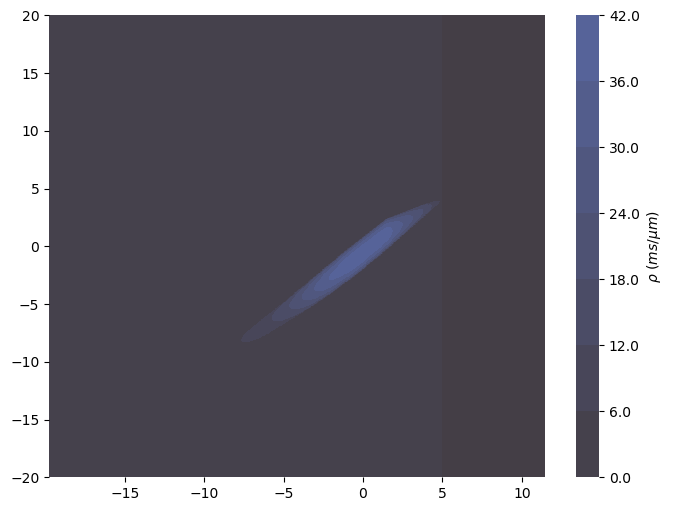

Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


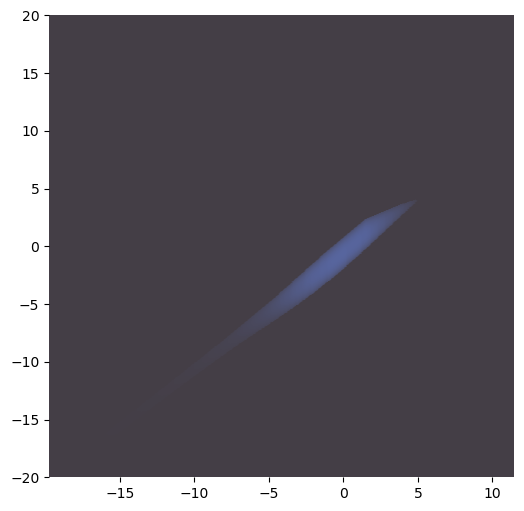

✅ Fichier enregistré sous : density_coupure_2_30.table
✅ Fichier enregistré sous : Pi_coupure_2_30.table
max Pi 106.7446501688187
🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2025-01-27/rho_bon_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/Domain_Wall_Dynamics_for_a_1D_Bose_ga/Figures/data/2025-01-27/rho_bon_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz"
ssh: connect to host 10.117.49.59 port 22: Operation timed out
rsync: connection unexpectedly closed (0 bytes received so far) [receiver]
rsync error: unexplained error (code 255) at /AppleInternal/Library/BuildRoots/e0873e53-5185-11ef-9a51-9ab6d782fe32/Library/Caches/com.apple.xbs/Sources/rsync/rsync/io.c(453) [receiver=2.6.9]
filename = 2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz
🚀 Exéc

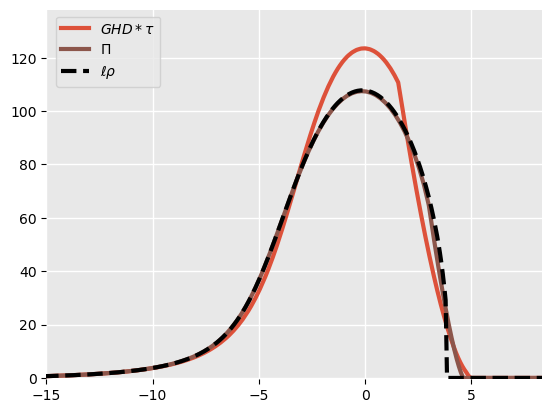

In [106]:
PI , GHD , N  = [] , [] , [] 
liste_t = np.array([0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ])
mask = (liste_t >= 0) & (liste_t <= 30)
mask = [ t in np.array([ 30.000]) for t in liste_t ]
print(mask)

##mat_nu_1 = np.array([
#        np.array([f_mat_nu_bord(v, theta , v1 = veff_bord_discr_exp_2 , v2 =  0.00001*theta_discr_exp +veff_bord_discr_exp_2[-1]   ) for theta in theta_discr_exp_2])
#        for v in veff_bord_discr_exp_2
#    ]) 

mat_rho = np.array([0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr, nu, np.ones(len(theta_discr))) for nu in mat_nu ]  )

# theta_discr_exp
filename = f"{date}/theta_discr_exp_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
theta_discr_exp = np.load(filename)
Temps_exp = 30

for t in liste_t[mask] :
    filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    bord1 = np.load(filename)
    filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    bord2 = np.load(filename)
    
    veff_bord_discr_exp_2 = np.linspace(min(bord1[0] , bord2[0]) , max(bord2[-1] , bord1[-1]), 200)*Taille/Temp_bord
    theta_discr_exp_2 = np.linspace(theta_discr[0] , theta_discr[-1], 600)
    mat_nu_bord = np.array([
        np.array([f_mat_nu_bord(v, theta , v1 = bord1*Taille/Temp_bord , v2 = bord2*Taille/Temp_bord ) for theta in theta_discr_exp_2])
        for v in veff_bord_discr_exp_2
    ])  
    #vmin=0
    #vmax=1
    X0, Y0 = np.meshgrid(veff_bord_discr*Temp_bord/t, theta_discr)
    #plt.contourf( X0, Y0,   np.array([nu0 for v in veff_bord_discr]).T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    #plt.contourf( X0, Y0,   mat_nu.T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    X, Y = np.meshgrid(veff_bord_discr_exp_2*Temp_bord/t, theta_discr_exp_2)
    #plt.contourf( X, Y,   mat_nu_bord.T, cmap='viridis' , vmin=vmin, vmax=vmax, alpha = 0.5)
    #plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    #plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.show()

    #plt.plot(veff_bord_discr*Temp_bord , theta_veff_fun(veff_bord_discr) , label = "veff" )
    
    #plt.plot(bord1*Taille, theta_discr_exp)
    #plt.plot(bord2*Taille , theta_discr_exp)
    #plt.plot(np.concatenate([bord1, np.flip(bord2)] , axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    #plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"$\mu m/ms$")
    #plt.legend()
    #plt.show()

    fig, ax = plt.subplots(figsize=(8, 6))

    mat_rho_bord = np.array([0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr_exp_2, nu, np.ones(len(theta_discr_exp_2))) for nu in mat_nu_bord ]  )
    nb_levels = 1000
    vmin, vmax = 0 , 5.6*Taille

    # Créer un graphique de contours
    #cf0 = ax.contourf(X0, Y0, mat_rho.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
    cf0 = ax.contourf(X0, Y0, np.array([np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
    cf = ax.contourf( X, Y,   mat_rho_bord.T*Taille, cmap=custom_cmap , vmin=vmin, vmax=vmax , alpha = 1)

    # Supprimer les traits noirs autour de la figure
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Ajouter la barre de couleur avec 1 décimale
    cbar = plt.colorbar(cf, ax=ax, label=r'$\rho~ (ms/\mu m)$')
    cbar.outline.set_visible(False)
    cbar.formatter = FormatStrFormatter('%.1f')
    cbar.update_ticks()
    
    # Sauvegarder le graphique complet avec les axes et la colorbar
    fig.savefig(f"complete_graph_coupure_2_{t:.0f}.pdf", dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    
    # Sauvegarder les axes sans le graphique ni la colorbar
    fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
    #ax_axes.contourf(X0, Y0, mat_rho.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
    ax_axes.contourf(X0, Y0, np.array([np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)    
    ax_axes.contourf(X, Y, mat_rho_bord.T*Taille, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
    #ax_axes.set_axis_off()  # Masquer les axes
    # Supprimer les traits noirs autour de la figure
    for spine in ax_axes.spines.values():
        spine.set_visible(False)
    fig_axes.savefig(f"graph_coupure_2_{t:.0f}_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

    #plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    #plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.plot(np.concatenate([bord1, np.flip(bord2)], axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    #plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"$\mu m/ms$")
    #plt.legend()
    plt.show()





    #Pi = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,))
    #Ghd = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(1,))
    #nat = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,1))

    #PI.append(Pi)
    #GHD.append(Ghd)
    #N.append(nat)

    #plt.plot(theta_discr_exp_2 , Pi , label = f"Pi : {t:.3f}") 
    #for i , rho in enumerate(mat_rho_bord) :
    #    plt.plot(theta_discr_exp_2 , rho , label = f"rho : {i:.3f}") 
    #plt.xlabel(r"$\mu m/ms$")
    #plt.ylabel(r"$ms/\mu m$")
    #plt.legend()
    #plt.show()

    #plt.plot(veff_bord_discr_exp_2 , Ghd , label = f"GHD : {t:.3f}") 
    #plt.xlabel(r"$\mu m/ms$")
    #plt.ylabel(r"${\mu m}^{-1}$")
    #plt.legend()
    #plt.show()

    #plt.plot(theta_discr_exp_2*liste_t[-1]+x0, PI[0]/liste_t[-1] , label = f"Pi : {0:.3f}") 
    #plt.plot(veff_bord_discr_exp_2*Temp_bord, Ghd , label = f"Ghd : {t:.3f}") 
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"${\mu m}^{-1}$")
    #plt.legend()
    #plt.show()


    fig, ax1 = plt.subplots()
    
    label = r"$GHD*\tau$"
    filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    density = np.load(filename)    
    # Créer un nouvel intervalle allant de 0 à 400
    x_new = np.linspace(max(density[0, :] * Taille) , 400, 100)  # 100 points entre 0 et 400
    y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
    # Concaténer avec tes données existantes
    x_combined = np.concatenate([density[0, :] * Taille/t, x_new/t])
    y_combined = np.concatenate([density[1, :]*t, y_new*t])

    save_as_tikz_table(x_combined*8.8/20, y_combined*5/(max(Pi)) , filename=f"density_coupure_2_{t:.0f}.table")
    
    ax1.plot(x_combined, y_combined, linewidth=3, color=plt.cm.inferno(0.6), alpha=1,
         label=label)
    
    label = r"$\Pi$"
    index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
       
    x_new = np.linspace(max(theta_discr_exp*t +x0) , 400, 100)  # 100 points entre 0 et 400
    y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
    filename = f"{date}/Pi_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    Pi_0 = np.load(filename) * Taille
    # Concaténer avec tes données existantes
    x_combined = np.concatenate([theta_discr_exp +x0/t, x_new/t])
    y_combined = np.concatenate([Pi_0, y_new])

    save_as_tikz_table(x_combined*8.8/20, y_combined*5/(max(Pi)) , filename=f"Pi_coupure_2_{t:.0f}.table")
    
    ax1.plot(x_combined,  y_combined, linewidth=3, color="#8c564b",alpha=1, 
             label=label)

    print("max Pi" , max(Pi))

    
    label = r"$\ell\rho$"
    
    index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
    filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    filename = f"{date}/rho_bon_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    rho_theta_star_discr = np.load(filename)['arr_0']
    
    filename = f"{date}/theta_discr_exp_2_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    #filename = '2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz' 
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    theta_discr_exp_2 = np.load(filename)['arr_0']
       
    #theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 =  x0/t

    save_as_tikz_table((theta_discr_exp_2+theta0)*8.8/20, rho_theta_star_discr*Taille*5/(max(Pi)) , filename=f"rho_coupure_2_{t:.0f}.table")
    
    ax1.plot((theta_discr_exp_2+theta0), 
             rho_theta_star_discr*Taille , 
             linewidth=3 , 
             linestyle='--',
             alpha=1,
             color = "black",#"#bcbd22", 
             label=label)
    
    plt.ylim([-0.5 , 4.6*t ])
    plt.xlim([-450/t, 250/t ])    
    plt.grid(True)
    #plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    #plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    # Personnalisation de la légende
    ax1.legend(
        #loc='upper left',             # Position de la légende
        loc='upper left',
        #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
        #loc='best', 
        bbox_to_anchor=(0.005, 1),
        #fancybox=False,                  # Ajouter une bordure arrondie
        #shadow=False,                    # Ajouter une ombre
        #ncol=1,                         # Nombre de colonnes pour les entrées de la légende
        #fontsize=police,                    # Taille de la police
        #framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
        facecolor='#e8e8e8',                  # Couleur de fond de la légende
        #edgecolor='black',              # Couleur du bord de la légende
        #title='Légende de l\'expérience', # Titre de la légende
        #title_fontsize='large',         # Taille de la police du titre
        #labelspacing=0.1,               # Espacement entre les labels de la légende
        #handlelength=0.5,               # Longueur des poignées des items de la légende
        #handleheight=1.5,               # Hauteur des poignées des items de la légende
        #columnspacing=0,               # Espacement entre les colonnes
        #alignment = 'right',
    )
    plt.grid(color='white', linestyle='-', linewidth=1)
    # Rendre le cadre invisible
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    # Appliquer un fond gris
    #plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas
    
    
    # Appliquer un fond gris clair au graphe
    #plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
    plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
    plt.savefig('Figures/article_distribution_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
    plt.savefig('Figures/article_distribution_24-04-2024.svg', bbox_inches='tight', dpi = 300)
    plt.show()

🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2025-01-27/theta_discr_exp_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/Domain_Wall_Dynamics_for_a_1D_Bose_ga/Figures/data/2025-01-27/theta_discr_exp_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz"
receiving file list ... 
1 file to consider

sent 16 bytes  received 183 bytes  132.67 bytes/sec
total size is 1.68K  speedup is 8.44
🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2025-01-27/density_expansion_nu_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/Domain_Wall_Dynamics_for_a_1D_Bose_ga/Figures/data/

NameError: name 'police' is not defined

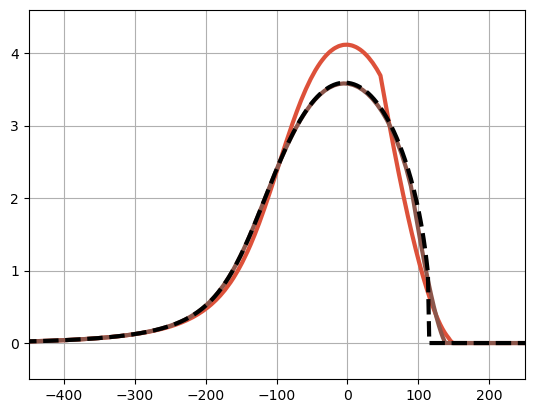

In [104]:
# theta_discr_exp
filename = f"{date}/theta_discr_exp_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
theta_discr_exp = np.load(filename)
Temps_exp = 30
fig, ax1 = plt.subplots()

# densité
filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{Temps_exp:.3f}.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
density = np.load(filename)     
label = r"GHD"
# Créer un nouvel intervalle allant de 0 à 400
x_new = np.linspace(max(density[0, :] * Taille) , 400, 100)  # 100 points entre 0 et 400
y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
# Concaténer avec tes données existantes
x_combined = np.concatenate([density[0, :] * Taille, x_new])
y_combined = np.concatenate([density[1, :], y_new])   
ax1.plot(x_combined, y_combined, linewidth=3, color=plt.cm.inferno(0.6), alpha=1,
     label=label)

#ax1.plot(X[mask], Y[mask], label=f"donnés du "+ date_donnees + ' : ' + label )
index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore

label = r"$\Pi/\tau$"
x_new = np.linspace(max(theta_discr_exp*Temps_exp +x0) , 400, 100)  # 100 points entre 0 et 400
y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
filename = f"{date}/Pi_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
Pi_0 = np.load(filename) * Taille
# Concaténer avec tes données existantes
x_combined = np.concatenate([theta_discr_exp*Temps_exp +x0, x_new])
y_combined = np.concatenate([Pi_0/Temps_exp, y_new])
ax1.plot(x_combined,  y_combined, linewidth=3, color="#8c564b",alpha=1, 
         label=label)


index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
filename = f"{date}/rho_bon_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
rho_theta_star_discr = np.load(filename)['arr_0']

filename = f"{date}/theta_discr_exp_2_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
#filename = '2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz' 
print ( 'filename =' ,filename )
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
theta_discr_exp_2 = np.load(filename)['arr_0']

label = r"$\ell\rho/\tau$"


#theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
theta0 =  x0/Temps_exp

ax1.plot((theta_discr_exp_2+theta0)*Temps_exp, 
         rho_theta_star_discr/Temps_exp*Taille , 
         linewidth=3 , 
         linestyle='--',
         alpha=1,
         color = "black",#"#bcbd22", 
         label=label)

plt.ylim([-0.5 , 4.6 ])
plt.xlim([-450, 250 ])    
plt.grid(True)
#plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
# Personnalisation de la légende
ax1.legend(
    #loc='upper left',             # Position de la légende
    loc='upper left',
    #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
    #loc='best', 
    bbox_to_anchor=(0.005, 1),
    #fancybox=False,                  # Ajouter une bordure arrondie
    #shadow=False,                    # Ajouter une ombre
    #ncol=1,                         # Nombre de colonnes pour les entrées de la légende
    fontsize=police,                    # Taille de la police
    #framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
    facecolor='#e8e8e8',                  # Couleur de fond de la légende
    #edgecolor='black',              # Couleur du bord de la légende
    #title='Légende de l\'expérience', # Titre de la légende
    #title_fontsize='large',         # Taille de la police du titre
    #labelspacing=0.1,               # Espacement entre les labels de la légende
    #handlelength=0.5,               # Longueur des poignées des items de la légende
    #handleheight=1.5,               # Hauteur des poignées des items de la légende
    #columnspacing=0,               # Espacement entre les colonnes
    #alignment = 'right',
)
plt.grid(color='white', linestyle='-', linewidth=1)
# Rendre le cadre invisible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Appliquer un fond gris
#plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas


# Appliquer un fond gris clair au graphe
#plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
plt.savefig('Figures/article_distribution_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
plt.savefig('Figures/article_distribution_24-04-2024.svg', bbox_inches='tight', dpi = 300)
plt.show()